In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [4]:
from glob import glob
from PIL import Image

In [5]:
femalepath1=glob('./data/training/female/*.jpg')
malepath1=glob('./data/training/male/*.jpg')

In [6]:
femalepath=femalepath1[:7000]
malepath=malepath1[:7000]

In [7]:
len(femalepath),len(femalepath1),len(malepath),len(malepath1)

(7000, 23243, 7000, 23766)

In [8]:
print(len(femalepath),len(malepath))

7000 7000


In [9]:
#let us consider one image
path=femalepath[0]
img=cv2.imread(path)

In [10]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(114, 92)

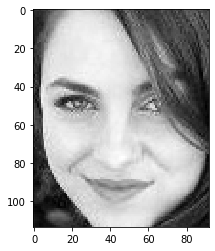

In [11]:
plt.imshow(gray,cmap='gray')
plt.show()

In [2]:
haar=cv2.CascadeClassifier('./model/haarcascade_frontalface_default.xml')

In [4]:
haar.detectMultiScale?

In [5]:
# our image is already crop so we don't need to crop it
faces=haar.detectMultiScale(gray,1.5,5)  #gray-image,1.5- scaling factor,negihbour
print(faces)

NameError: name 'gray' is not defined

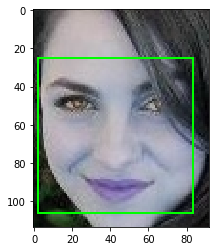

In [14]:
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
plt.imshow(img)
plt.show()
#rectangle around coordinate which are recognized as faces by haar caascade classifier

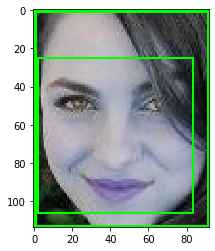

In [15]:
cv2.rectangle(img,(0,0),(92,114),(0,255,0),2)
plt.imshow(img)
plt.show()
#rectangle around whole pic

# image is already cropped so we didn't need to crop it

## we can see that data is in unstructered form.It means size/dimension of images are not same.So we can make dimension of all images same 
- for making dimension of all images same we firstly analyise the data and after that we can come to any conclusion

# Going deep insight the data

In [16]:
ls data\Training

 Volume in drive C has no label.
 Volume Serial Number is EE70-5BF2

 Directory of C:\Users\hp\Desktop\placements\gender_prediction\data\Training

23-07-2021  09:41    <DIR>          .
23-07-2021  09:41    <DIR>          ..
23-07-2021  09:41    <DIR>          female
23-07-2021  09:42    <DIR>          male
               0 File(s)              0 bytes
               4 Dir(s)  92,686,196,736 bytes free


In [17]:
whole_path=femalepath+malepath  #path when mixing both images male and female

In [18]:
len(whole_path)

14000

In [19]:
#getting size of image
def getsize(path):
    img=Image.open(path)
    return (img.size[0]*img.size[1])

In [20]:
df=pd.DataFrame(data=whole_path,columns=['img_path'])
df.head()  # display top 5 rows

,img_path
0,./data/training/female\131422.jpg.jpg
1,./data/training/female\131423.jpg.jpg
2,./data/training/female\131425.jpg.jpg
3,./data/training/female\131427.jpg.jpg
4,./data/training/female\131428.jpg.jpg


In [21]:
df.shape

(14000, 1)

In [22]:
df['size']=df['img_path'].apply(getsize)
df.head()

,img_path,size
0,./data/training/female\131422.jpg.jpg,10488
1,./data/training/female\131423.jpg.jpg,9680
2,./data/training/female\131425.jpg.jpg,8000
3,./data/training/female\131427.jpg.jpg,8670
4,./data/training/female\131428.jpg.jpg,9202


In [23]:
df.tail()

,img_path,size
13995,./data/training/male\123365.jpg.jpg,9374
13996,./data/training/male\123366.jpg.jpg,8480
13997,./data/training/male\123369.jpg.jpg,8217
13998,./data/training/male\123373.jpg.jpg,8262
13999,./data/training/male\123376.jpg.jpg,8586


In [24]:
df.describe()

,size
count,14000.000000
mean,8905.968214
std,1005.552106
min,3540.000000
25%,8216.000000
50%,8856.000000
75%,9570.000000
max,15587.000000


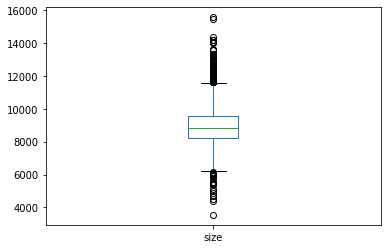

In [25]:
df['size'].plot('box')

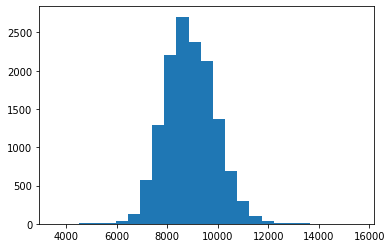

In [26]:
plt.hist(df['size'],bins=25)
plt.show()

## so from analysis i will resize all the image in 100X100 form and remove image with size less or equal to 6400 means less than  88X88

In [27]:
df_new=df[df['size']>=7747]

In [28]:
df_new.shape

(12371, 2)

In [29]:
def gender(string):
    try:
        return string.split('\\')[0].split('/')[-1]
    except:
        return None

In [30]:
string=df_new['img_path'][0]
string

'./data/training/female\\131422.jpg.jpg'

In [31]:
gender(string)

'female'

In [32]:
# adding one more column in new_df as gender for y label in dataset
df_new['gender']=df_new['img_path'].apply(gender)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
df_new.head()

,img_path,size,gender
0,./data/training/female\131422.jpg.jpg,10488,female
1,./data/training/female\131423.jpg.jpg,9680,female
2,./data/training/female\131425.jpg.jpg,8000,female
3,./data/training/female\131427.jpg.jpg,8670,female
4,./data/training/female\131428.jpg.jpg,9202,female


In [34]:
df_new.tail()

,img_path,size,gender
13995,./data/training/male\123365.jpg.jpg,9374,male
13996,./data/training/male\123366.jpg.jpg,8480,male
13997,./data/training/male\123369.jpg.jpg,8217,male
13998,./data/training/male\123373.jpg.jpg,8262,male
13999,./data/training/male\123376.jpg.jpg,8586,male


In [35]:
df_new['gender'].value_counts()

female    6335
male      6036
Name: gender, dtype: int64

In [36]:
df_new['gender'].value_counts(normalize=True)

female    0.512085
male      0.487915
Name: gender, dtype: float64

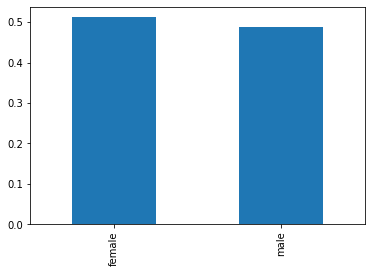

In [37]:
df_new['gender'].value_counts(normalize=True).plot(kind='bar')
plt.show()

## we can see that data set is fully balanced
- 51.2 % is female and 48.8% is male so overall data set is fully balanced
- all the image size is greater than or equal to 88X88
## conclusion: convert all images in df_new to 100X100

# resize image

In [38]:
def resize_img(path_to_resize):
    try:
        #step-1:  read image
        img=cv2.imread(path_to_resize)
        # step2: convert into grayscale image
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # step3 :resize into 100*100
        size=gray.shape[0]*gray.shape[1]
        if size>=10000:  #shrink
            gray_re=cv2.resize(gray,(100,100),cv2.INTER_AREA) # SHRINK
        else: #enlarge
            gray_re=cv2.resize(gray,(100,100),cv2.INTER_CUBIC)  #Enlarge
        #step-4: flatten image(1X10000)
        return gray_re.flatten()
    except:
        return None

In [39]:
len(resize_img(whole_path[0]))

10000

In [40]:
#structuring function 
df_new['structure_data']=df_new['img_path'].apply(resize_img)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
df_new.head()

,img_path,size,gender,structure_data
0,./data/training/female\131422.jpg.jpg,10488,female,"[39, 43, 44, 39, 43, 47, 49, 50, 53, 66, 74, 7..."
1,./data/training/female\131423.jpg.jpg,9680,female,"[12, 12, 10, 8, 8, 9, 7, 5, 5, 8, 6, 6, 6, 8, ..."
2,./data/training/female\131425.jpg.jpg,8000,female,"[60, 55, 44, 38, 46, 35, 28, 40, 49, 36, 38, 4..."
3,./data/training/female\131427.jpg.jpg,8670,female,"[148, 149, 150, 151, 152, 153, 157, 158, 159, ..."
4,./data/training/female\131428.jpg.jpg,9202,female,"[89, 96, 109, 123, 131, 136, 149, 168, 184, 19..."


In [42]:
df1=df_new['structure_data'].apply(pd.Series)   #expanding structure_data column (4th column of new_df) to 10000 columns

In [44]:
df2=pd.concat((df_new['gender'],df1),axis=1)

In [45]:
df2.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,39,43,44,39,43,47,49,50,53,...,19,14,12,11,12,15,19,19,17,15
1,female,12,12,10,8,8,9,7,5,5,...,9,8,9,9,8,6,6,8,11,14
2,female,60,55,44,38,46,35,28,40,49,...,38,36,34,31,32,43,58,66,65,60
3,female,148,149,150,151,152,153,157,158,159,...,159,164,166,164,165,167,169,169,169,169
4,female,89,96,109,123,131,136,149,168,184,...,188,186,191,188,184,185,187,189,189,187


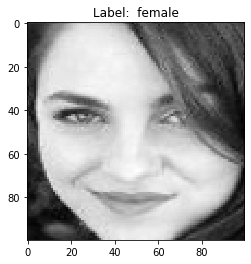

In [46]:
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')
plt.title("Label:  "+df2.loc[0]['gender'])
plt.show()

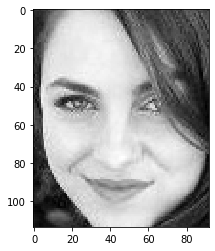

In [47]:
plt.imshow(gray,cmap='gray')
plt.show()

In [48]:
# save the data into pickle format
import pickle

In [49]:
pickle.dump(df2,open('./data/dataframe_images_100_100.pickle','wb'))

In [50]:
# reading the pickle data
dfpickle=pickle.load(open('./data/dataframe_images_100_100.pickle','rb'))

In [51]:
dfpickle.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,39,43,44,39,43,47,49,50,53,...,19,14,12,11,12,15,19,19,17,15
1,female,12,12,10,8,8,9,7,5,5,...,9,8,9,9,8,6,6,8,11,14
2,female,60,55,44,38,46,35,28,40,49,...,38,36,34,31,32,43,58,66,65,60
3,female,148,149,150,151,152,153,157,158,159,...,159,164,166,164,165,167,169,169,169,169
4,female,89,96,109,123,131,136,149,168,184,...,188,186,191,188,184,185,187,189,189,187


In [52]:
dfpickle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12371 entries, 0 to 13999
Columns: 10001 entries, gender to 9999
dtypes: object(1), uint8(10000)
memory usage: 118.2+ MB


In [53]:
# checking for missing values
dfpickle.isnull().sum()

gender    0
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
         ..
9970      0
9971      0
9972      0
9973      0
9974      0
9975      0
9976      0
9977      0
9978      0
9979      0
9980      0
9981      0
9982      0
9983      0
9984      0
9985      0
9986      0
9987      0
9988      0
9989      0
9990      0
9991      0
9992      0
9993      0
9994      0
9995      0
9996      0
9997      0
9998      0
9999      0
Length: 10001, dtype: int64

- we can see that there is no missing values in dfpickle dataset

# data preprocessing
- remove missing value (there is no missing values)
- remove outliers using data normalization (min-max scaling)
# min-max scaling
## xnorm=$\frac{x-minValue} {maxValue-minValue}$

In [54]:
# split into two parts
X=dfpickle.iloc[:,1:].values # independet features
Y=dfpickle.iloc[:,0].values  #dependent features

In [55]:
X.shape,Y.shape

((12371, 10000), (12371,))

In [56]:
X.min(),X.max()

(0, 255)

In [57]:
Xnorm=X/(X.max())

In [58]:
Xnorm

array([[0.15294118, 0.16862745, 0.17254902, ..., 0.0745098 , 0.06666667,
        0.05882353],
       [0.04705882, 0.04705882, 0.03921569, ..., 0.03137255, 0.04313725,
        0.05490196],
       [0.23529412, 0.21568627, 0.17254902, ..., 0.25882353, 0.25490196,
        0.23529412],
       ...,
       [0.2       , 0.20392157, 0.21176471, ..., 0.26666667, 0.23137255,
        0.19607843],
       [0.14117647, 0.12156863, 0.12941176, ..., 0.59215686, 0.65882353,
        0.65882353],
       [0.04705882, 0.02352941, 0.03137255, ..., 0.57254902, 0.56078431,
        0.57647059]])

In [59]:
Xnorm.shape

(12371, 10000)

In [60]:
Y

array(['female', 'female', 'female', ..., 'male', 'male', 'male'],
      dtype=object)

In [61]:
#convert female to 1 and male to 0 (labeling the output)
y_norm=np.where(Y=='female',1,0)

In [62]:
y_norm

array([1, 1, 1, ..., 0, 0, 0])

In [63]:
# saving x and y as numoy data
np.savez('./data/data_100_100_norm',Xnorm,y_norm)

# eigen images with PCA

In [64]:
#load numpy zip
data =np.load('./data/data_100_100_norm.npz')

In [65]:
data.files

['arr_0', 'arr_1']

In [66]:
x=data['arr_0'] #independent features
y=data['arr_1']    #target value

In [67]:
x.shape,y.shape

((12371, 10000), (12371,))

In [1]:
from sklearn.decomposition import PCA

In [69]:
pca=PCA(n_components=None,whiten=True,svd_solver='auto')

In [70]:
x1=x-x.mean(axis=0)

In [71]:
x_pca=pca.fit_transform(x1)

In [72]:
x_pca.shape

(12371, 10000)

In [73]:
eigen_ratio=pca.explained_variance_ratio_
eigen_ratio_cum=np.cumsum(eigen_ratio)

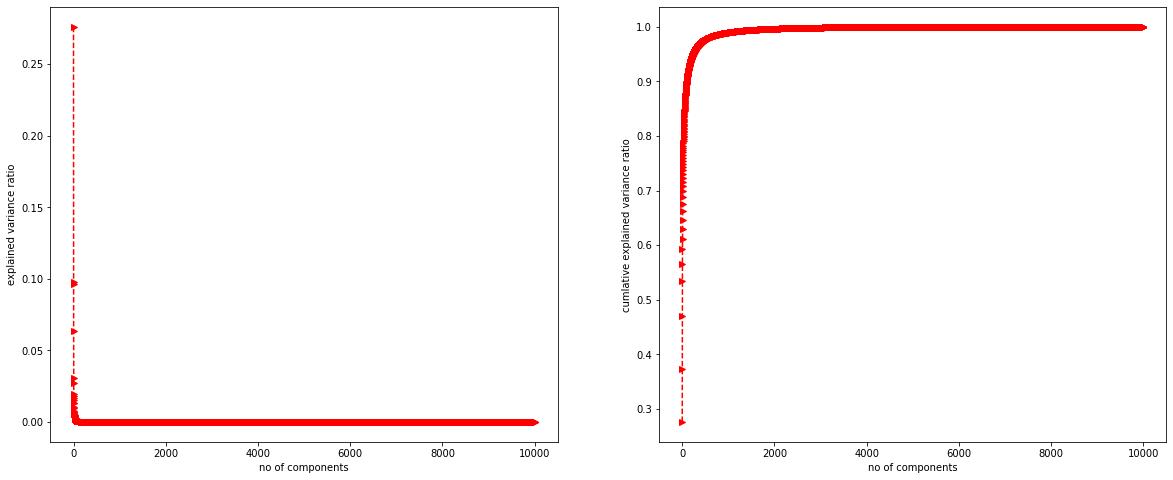

In [74]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(eigen_ratio,'r>--')
plt.xlabel('no of components')
plt.ylabel('explained variance ratio')
plt.subplot(1,2,2)
plt.xlabel('no of components')
plt.ylabel('cumlative explained variance ratio')
plt.plot(eigen_ratio_cum,'r>--')
plt.show()

## we can't analyse the situation by 10k components so trying to analyse by taking 1k components and try to get insight from data

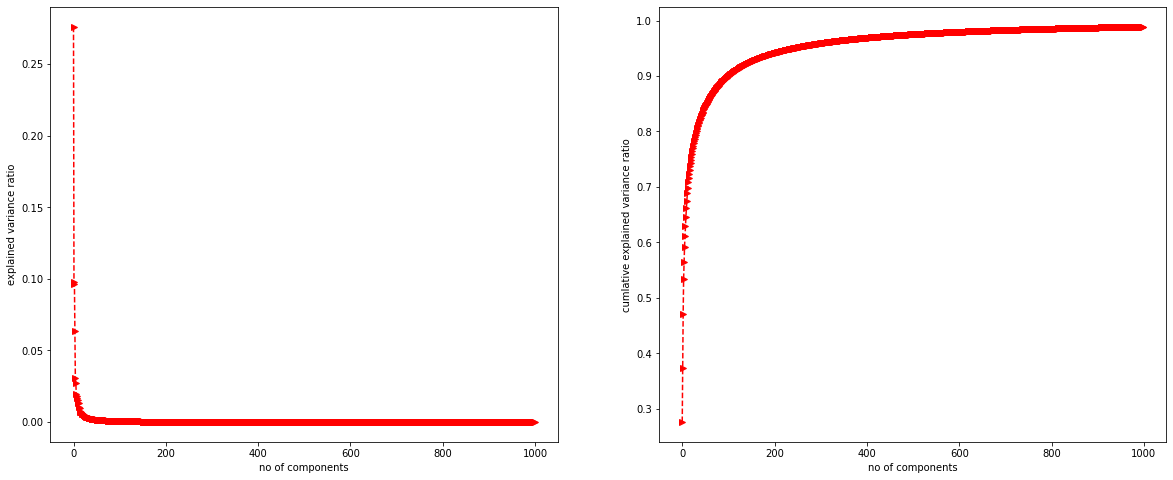

In [75]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:1000],'r>--')
plt.xlabel('no of components')
plt.ylabel('explained variance ratio')
plt.subplot(1,2,2)
plt.xlabel('no of components')
plt.ylabel('cumlative explained variance ratio')
plt.plot(eigen_ratio_cum[:1000],'r>--')
plt.show()

## we can see from above that we can get .90 comulative explained variance ratio by 200 components so i am going more deep insight the data for getting more info regarding potential number of components

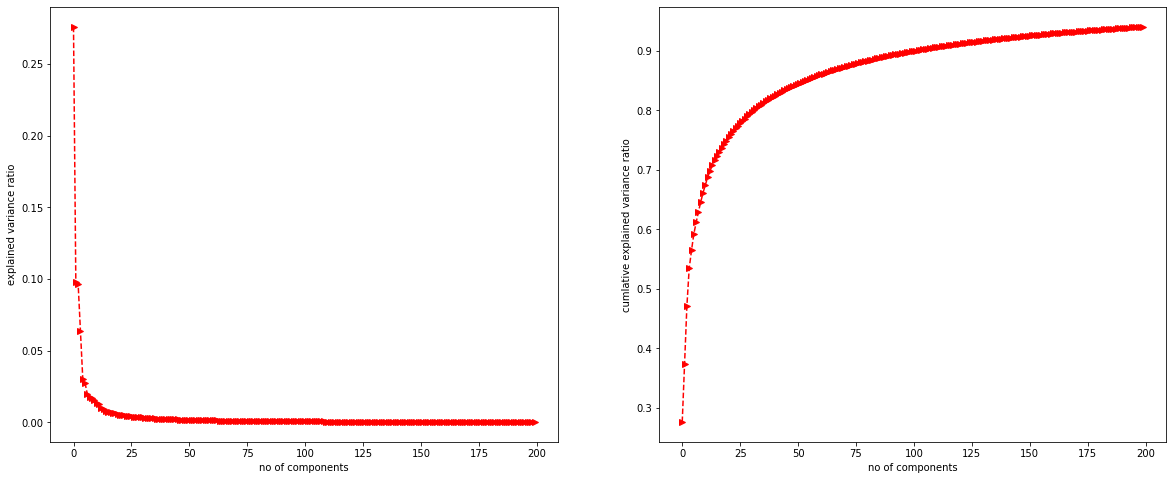

In [76]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.xlabel('no of components')
plt.ylabel('explained variance ratio')
plt.subplot(1,2,2)
plt.xlabel('no of components')
plt.ylabel('cumlative explained variance ratio')
plt.plot(eigen_ratio_cum[:200],'r>--')
plt.show()

## conclusion: 
- using elbow method,consider number of components is between 25-30
- since if i consider component between 25-30 the explained variance is around 75% so,in order to get min 80% variance i am considering 50% components
- for better result we can take those components which give 0.80 comulative explained variance and we can see from above graph that we can get 0.80 by taking only 50 components so we consider 50 components for our calculation

In [77]:
pca_50=PCA(n_components=50,whiten=True,svd_solver='auto')

In [78]:
x_pca_50=pca_50.fit_transform(x1)

In [79]:
x_pca_50.shape

(12371, 50)

  ## If we use pca to extract dimension such images which are obtained after applying pca is known as eigen images
- eigen image: we consider only those feature which are important for prediction

In [80]:
# saving this eigen images
pickle.dump(pca_50,open('./model/pca_50.pickle','wb'))

In [81]:
# consider 50 components and inverse transform
x_pca_inv=pca_50.inverse_transform(x_pca_50)

In [82]:
x_pca_inv.shape

(12371, 10000)

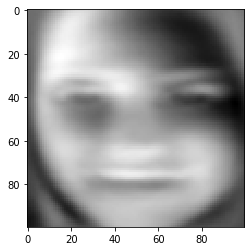

In [83]:
plt.imshow(x_pca_inv[0,:].reshape(100,100),cmap='gray')
plt.show()

In [91]:
# saving
np.savez('./data/data_pca_50_y_mean.pickle',x_pca_50,y,x.mean(axis=0))

In [92]:
temp=x.mean(axis=0)

In [93]:
temp.shape

(10000,)